In [15]:
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns #helps in visualising data

In [3]:
training_labels="dataset/train_label.pkl"
train_images="dataset/train_image.pkl"
test_images="dataset/test_image.pkl"

LOADING AND VISUALISING DATA

In [4]:
file_objects=[]
with (open(train_images,"rb")) as openfile: #from stackoverflow and pickle docs
    while True:
        try:
            file_objects.append(pickle.load(openfile))
        except EOFError:
            break
    

In [5]:
print(len(file_objects))
print(len(file_objects[0]))
print(type(file_objects[0][1]))
print(len(file_objects[0][1]))
print(type(file_objects[0][1][1]))  


1
8000
<class 'list'>
784
<class 'int'>


As seen, the data contains 8000 lists of 784 ints, that is 28*28, hence its a reasonable assumption that these are pixel values, however we will visualise to confirm the same. 
After checking the output of print (file_objects[0][1]), the values range from 0 to 255 hence the assumption is true.
Now, we need to check if 8000 labels are present or not

In [6]:
file_label_objects=[]
with (open(training_labels,"rb")) as openfile: #from stackoverflow and pickle docs
    while True:
        try:
            file_label_objects.append(pickle.load(openfile))
        except EOFError:
            break

In [7]:
len(file_label_objects[0])

8000

So we have 8000 training labels

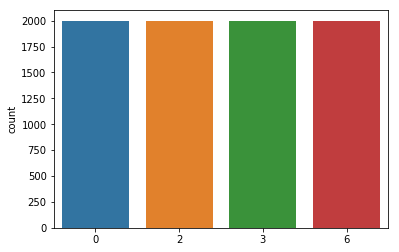

In [8]:
train_labels=file_label_objects[0]
input_class_graph=sns.countplot(train_labels)

so data is evenly distributed, now i will visualise image

In [9]:
train_images=file_objects[0]

In [13]:
#making a pandas dataframe, easier to handle stuff
train_df=pd.DataFrame(train_images)

In [14]:
train_df=train_df.values.reshape(-1,28,28,1)

2

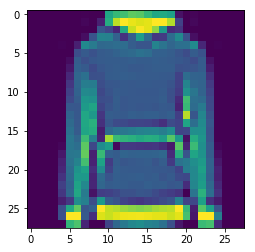

In [28]:
g=plt.imshow(train_df[3000][:,:,0])
train_labels[3000]
# after various iterations, it appears as if these are different type of clothings

In [29]:
#now the time to create model
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.
